# **1. Data Preprocessing**
1. Mapping label to binary: CG -> 1 (fake), OR -> 0 (original)

In [1]:
import pandas as pd
import numpy as np

file_path = '/kaggle/input/fake-review/fake_reviews.csv'
df = pd.read_csv(file_path)

print(df.head())

df.drop_duplicates(inplace=True)

print(df.isnull().sum())

df.dropna(subset=['text_', 'label'], inplace=True)

df['label'] = df['label'].map({'CG': 1, 'OR': 0})

print(df['label'].value_counts())

df = df[['text_', 'label']]

print(df.head())


             category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                               text_  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...  
category    0
rating      0
label       0
text_       0
dtype: int64
label
0    20215
1    20205
Name: count, dtype: int64
                                               text_  label
0  Love this!  Well made, sturdy, and very comfor...      1
1  love it, a great upgrade from the original.  I...      1
2  This pillow saved my back. I love the look and...      1
3  Missing information on how to use it, but it i...      1
4  Very nice

# **2. Features**
1. Apply the cleaning function to the text data
2. Use TF-IDF to convert text into numerical features
3. Split the data into training and test sets

In [2]:
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

def clean_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

df['cleaned_text'] = df['text_'].apply(clean_text)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])

y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# **3. Model Building**
1. Initialize the Random Forest model
2. Classification report to check precision, recall, and F1-score

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Training Accuracy: 0.9998762988619495
Test Accuracy: 0.8343641761504206

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      4043
           1       0.82      0.86      0.84      4041

    accuracy                           0.83      8084
   macro avg       0.83      0.83      0.83      8084
weighted avg       0.83      0.83      0.83      8084



# **4. Evaluation**
1. Confusion matrix and detailed metrics

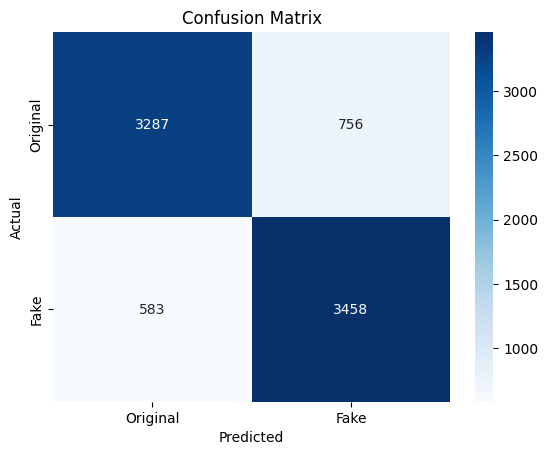

Final Test Accuracy: 0.8343641761504206


In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Original', 'Fake'], yticklabels=['Original', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f"Final Test Accuracy: {test_accuracy}")


# **Saving the model**

In [5]:
import joblib

model_filename = '/kaggle/working/fake_review_model.pkl'

joblib.dump(rf_model, model_filename)

print(f"Model saved as {model_filename}")


Model saved as /kaggle/working/fake_review_model.pkl


# **Loading the Model in Another Application**

In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

model_filename = 'fake_review_model.pkl'
loaded_model = joblib.load(model_filename)

new_reviews = [
    "This product is amazing! I love it, will buy again.", 
    "Worst product ever. It broke after one use, totally fake!"
]

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vectorized = tfidf_vectorizer.fit_transform(df['cleaned_text']) 

# Transform the new reviews
new_reviews_vectorized = tfidf_vectorizer.transform(new_reviews)

predictions = loaded_model.predict(new_reviews_vectorized)

print(predictions)
'''
# Save both model and vectorizer
joblib.dump(rf_model, 'fake_review_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


# Load model and vectorizer
model = joblib.load('fake_review_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
'''